# Import and Setup Operations



In [1]:
# Upload files (if not already uploaded)
# Make sure don't reload data again.
# Make sure load file: Mall_Customers.csv.

from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

# Data Importing

In [3]:
# Load the dataset from the sample_data directory
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


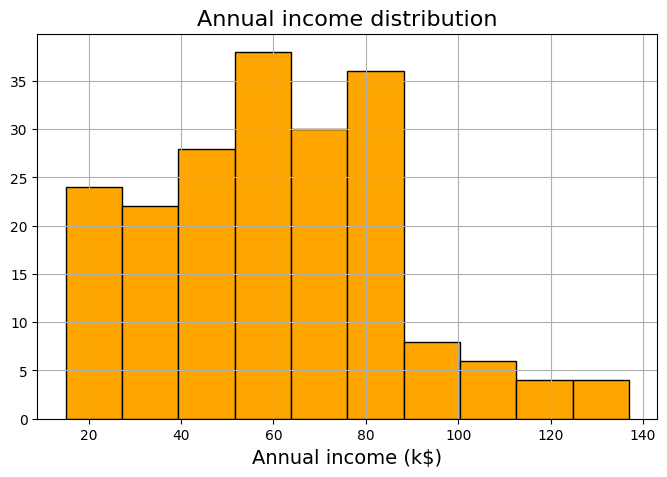

In [6]:
# Annual income distribution plot
plt.figure(figsize=(8,5))
plt.title("Annual income distribution",fontsize=16)
plt.xlabel ("Annual income (k$)",fontsize=14)
plt.grid(True)
plt.hist(df['Annual Income (k$)'],color='orange',edgecolor='k')
plt.show()

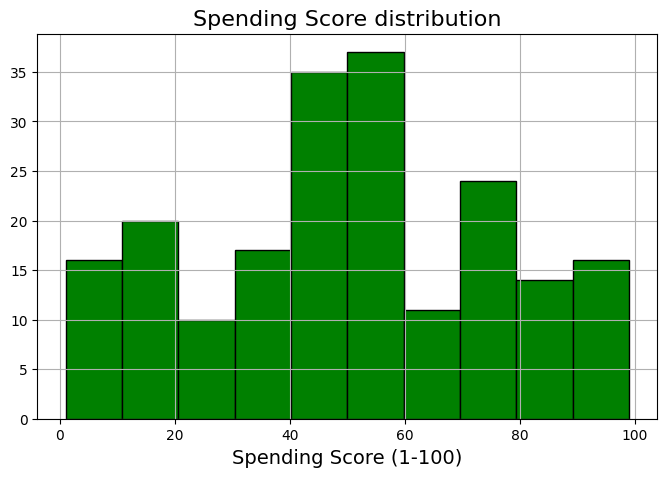

In [7]:
# Spending Score distribution
plt.figure(figsize=(8,5))
plt.title("Spending Score distribution",fontsize=16)
plt.xlabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.hist(df['Spending Score (1-100)'],color='green',edgecolor='k')
plt.show()

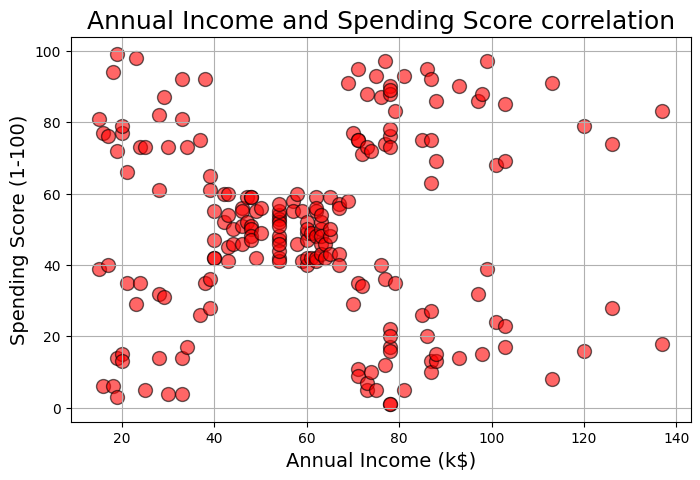

In [8]:
# Annual Income and Spending Score correlation
plt.figure(figsize=(8,5))
plt.title("Annual Income and Spending Score correlation",fontsize=18)
plt.xlabel ("Annual Income (k$)",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color='red',edgecolor='k',alpha=0.6, s=100)
plt.show()

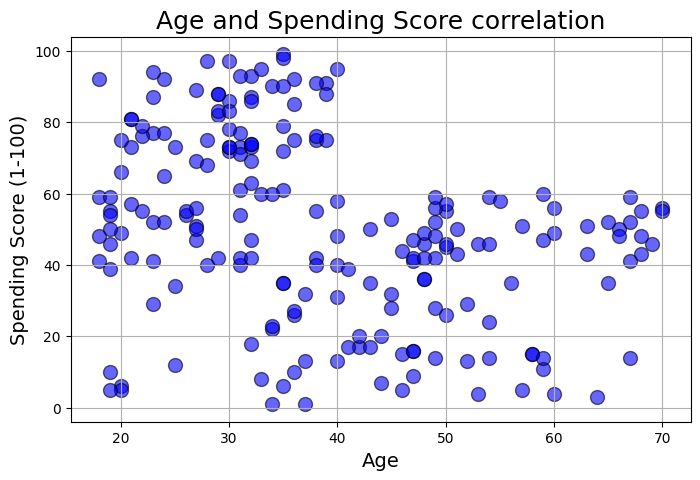

In [9]:
# Age and Spending Score correlation
plt.figure(figsize=(8,5))
plt.title("Age and Spending Score correlation",fontsize=18)
plt.xlabel ("Age",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Age'],df['Spending Score (1-100)'],color='blue',edgecolor='k',alpha=0.6, s=100)
plt.show()

# Data Processing

In [10]:
df.isnull().sum() # How many missing observations are there in each variable

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
# Handling missing values (if any)
df = df.dropna()

In [12]:
# One-hot encoding categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_encoded)

# Machine learning model (2-clutering-class)

## Hierarchical Clustering

In [13]:
# Hierarchical Clustering Dendrogram
X = df.iloc[:,[3,4]].values
linked = sch.linkage(data_scaled, method='ward')

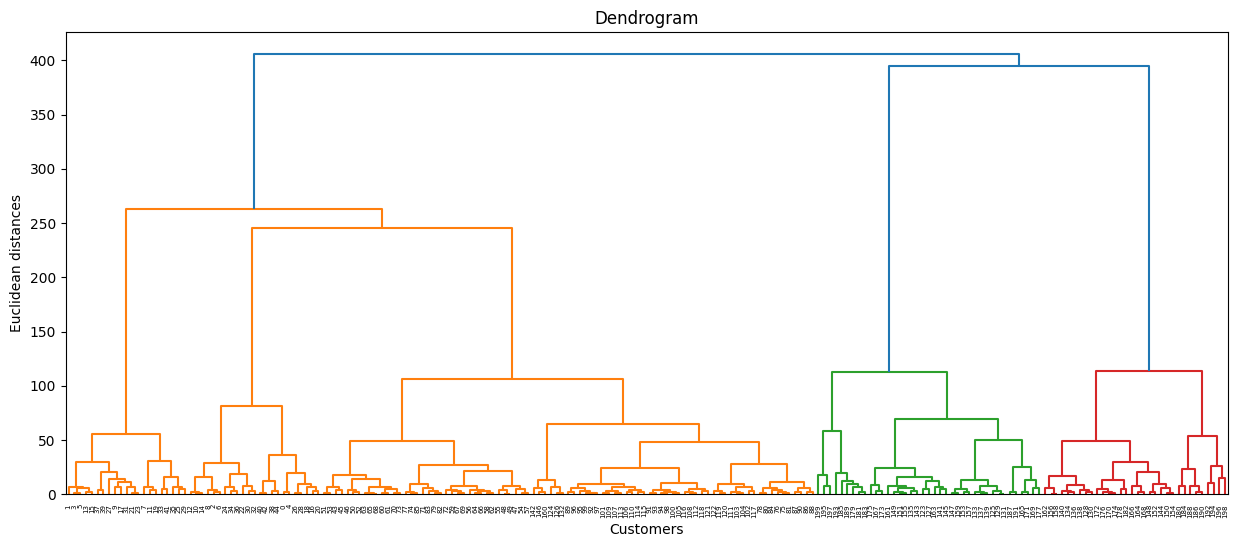

In [14]:
# Plotting the dendrogram
plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

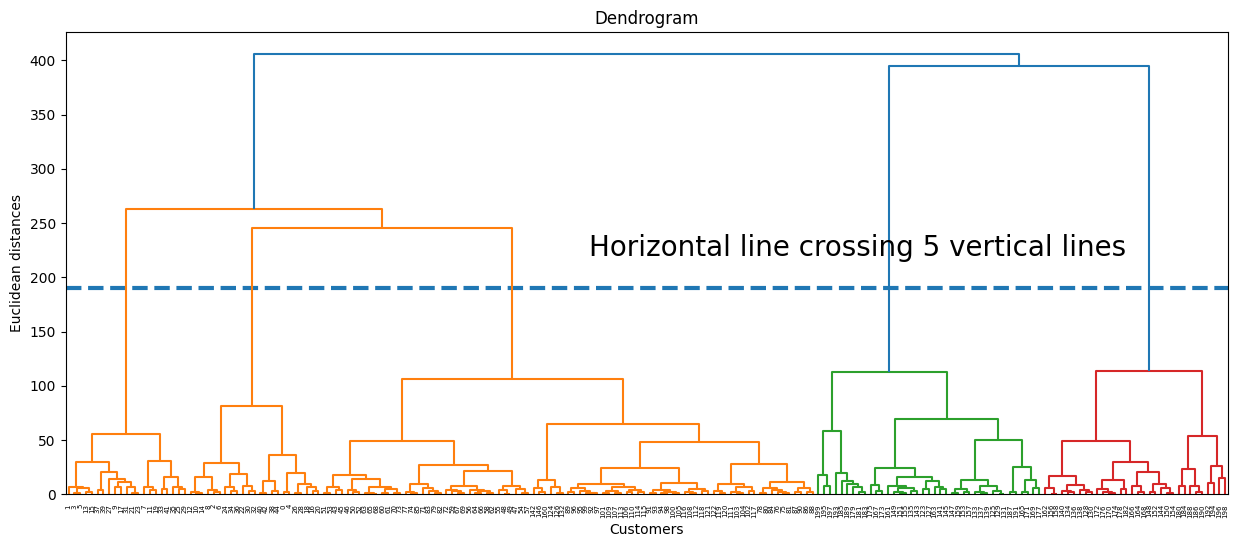

In [15]:
# Cut the dendrogram to get clusters
plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.hlines(y=190,xmin=0,xmax=2000,lw=3,linestyles='--')
plt.text(x=900,y=220,s='Horizontal line crossing 5 vertical lines',fontsize=20)
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()



In [16]:
# Build the model
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
y_hc = hc.fit_predict(X)

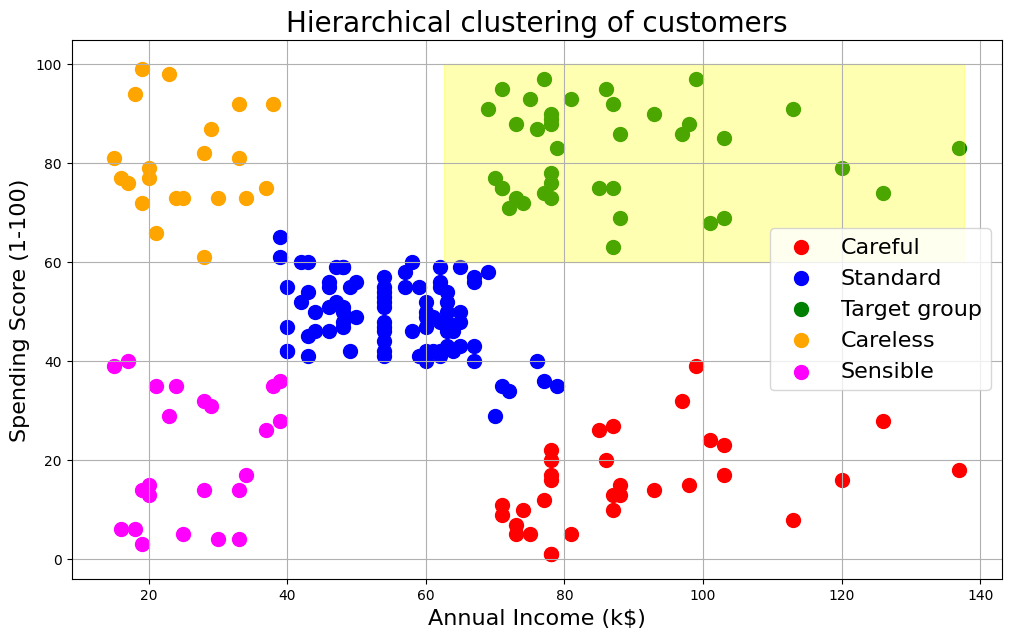

In [17]:
plt.figure(figsize=(12,7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target group')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'orange', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Hierarchical clustering of customers',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=16)
plt.ylabel('Spending Score (1-100)',fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.axhspan(ymin=60,ymax=100,xmin=0.4,xmax=0.96,alpha=0.3,color='yellow')
plt.show()

## K-Means Clustering

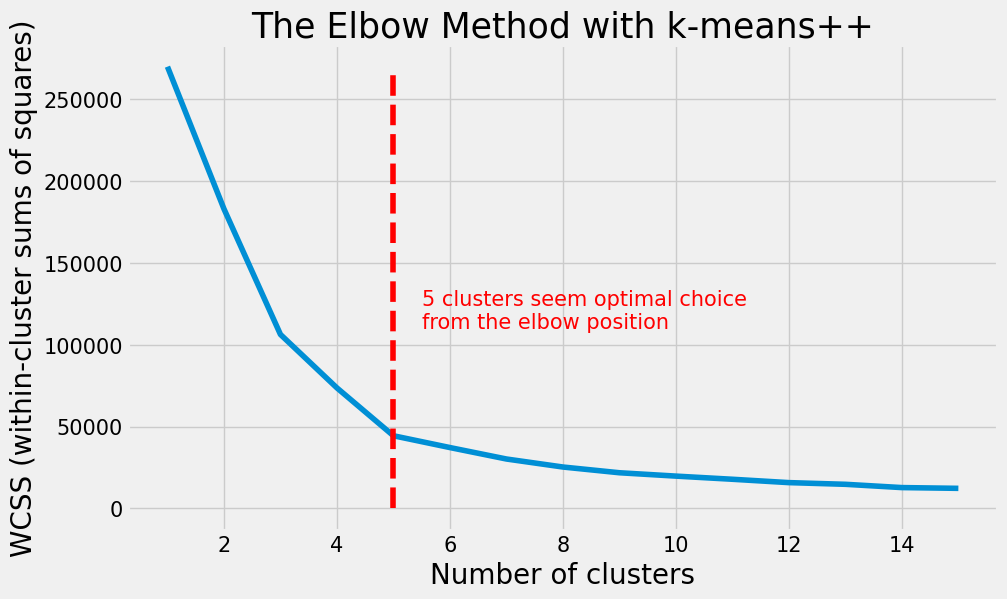

In [18]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 16), wcss)
    plt.title('The Elbow Method with k-means++', fontsize=25)
    plt.xlabel('Number of clusters', fontsize=20)
    plt.ylabel('WCSS (within-cluster sums of squares)', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.vlines(x=5, ymin=0, ymax=max(wcss), linestyles='--', colors='red')
    plt.text(x=5.5, y=110000, s='5 clusters seem optimal choice \nfrom the elbow position',
             fontsize=15, color='red')  # Changed fontcolor to color
    plt.show()


In [19]:
# K-Means Clustering
num_clusters_kmeans = 5  # Set based on the elbow method or domain knowledge
kmeans = KMeans(n_clusters=num_clusters_kmeans, init='k-means++', max_iter=300, n_init=10, random_state=42)
labels_kmeans = kmeans.fit_predict(data_scaled)


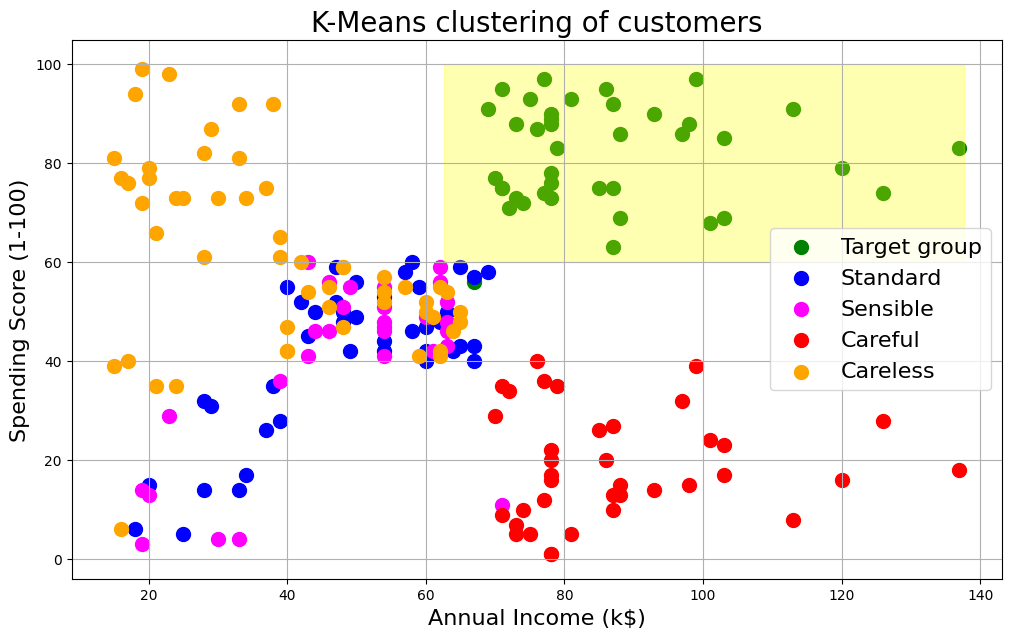

In [20]:
# K-Means Clustering Plot
plt.figure(figsize=(12,7))

plt.scatter(X[labels_kmeans == 0, 0], X[labels_kmeans == 0, 1], s = 100, c = 'green', label = 'Target group')
plt.scatter(X[labels_kmeans == 1, 0], X[labels_kmeans == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[labels_kmeans == 2, 0], X[labels_kmeans == 2, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(X[labels_kmeans == 3, 0], X[labels_kmeans == 3, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[labels_kmeans == 4, 0], X[labels_kmeans == 4, 1], s = 100, c = 'orange', label = 'Careless')

plt.title('K-Means clustering of customers', fontsize=20)
plt.xlabel('Annual Income (k$)', fontsize=16)
plt.ylabel('Spending Score (1-100)', fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.axhspan(ymin=60, ymax=100, xmin=0.4, xmax=0.96, alpha=0.3, color='yellow')
plt.show()

# Performance Evaluation Compare

In [21]:
# Calculate Silhouette Score
silhouette_hierarchical = silhouette_score(df_encoded, y_hc)
silhouette_kmeans = silhouette_score(df_encoded, labels_kmeans)

# Calculate Davies-Bouldin Index
davies_bouldin_hierarchical = davies_bouldin_score(df_encoded, y_hc)
davies_bouldin_kmeans = davies_bouldin_score(df_encoded, labels_kmeans)

# Calculate Calinski-Harabasz Index
calinski_harabasz_hierarchical = calinski_harabasz_score(df_encoded, y_hc)
calinski_harabasz_kmeans = calinski_harabasz_score(df_encoded, labels_kmeans)


# Print the results
print(f'\nSilhouette Score for Hierarchical Clustering: {silhouette_hierarchical}')
print(f'Silhouette Score for K-Means Clustering:  {silhouette_kmeans}')
print(f'\nDavies-Bouldin Index for Hierarchical Clustering: {davies_bouldin_hierarchical}')
print(f'Davies-Bouldin Index for K-Means Clustering: {davies_bouldin_kmeans}')
print(f'\nCalinski-Harabasz Index for Hierarchical Clustering: {calinski_harabasz_hierarchical}')
print(f'Calinski-Harabasz Index for K-Means Clustering: {calinski_harabasz_kmeans}')




Silhouette Score for Hierarchical Clustering: 0.4259188854391319
Silhouette Score for K-Means Clustering:  0.2114493609692701

Davies-Bouldin Index for Hierarchical Clustering: 0.7197537365856501
Davies-Bouldin Index for K-Means Clustering: 4.438874275656445

Calinski-Harabasz Index for Hierarchical Clustering: 221.13334056236604
Calinski-Harabasz Index for K-Means Clustering: 116.34902953051716
